In [76]:
import pickle
import numpy as np
import pandas as pd
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

In [2]:
with open('DataWrangling/df_features_train.pickle', 'rb') as f:
    df_train = pickle.load(f)

df_train.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11,targets
bass_synthetic_107-056-075,1,-464.739034,73.497955,63.116447,48.108825,31.025012,14.320454,0.017443,-10.511474,-16.714126,...,0.056975,0.013938,0.028138,0.050709,0.487929,0.614493,0.435582,0.032069,0.004083,0
bass_synthetic_078-062-100,0,-363.035428,114.585642,-0.264277,0.179338,0.178242,-2.319644,0.886480,-1.249431,0.269356,...,0.500799,0.093680,0.025879,0.022395,0.036193,0.033505,0.110375,0.129588,0.038207,0
bass_synthetic_106-038-025,0,-394.228742,198.185541,84.835110,-6.086613,-33.108344,-19.092043,-4.297194,-1.915769,-2.359507,...,0.383752,0.056206,0.085008,0.174667,0.101176,0.160597,0.251001,0.146896,0.048511,0
bass_electronic_024-025-127,1,-408.433103,95.857174,71.383336,56.379193,41.276001,28.982601,22.165213,17.668771,14.229128,...,0.102857,0.080990,0.056740,0.041706,0.207965,0.320208,0.147046,0.057054,0.058128,0
bass_synthetic_094-094-025,0,-532.548526,-10.137039,-22.214534,26.531165,1.674073,7.063939,4.614965,-21.844682,17.727311,...,0.037805,0.037097,0.018134,0.014596,0.019296,0.015597,0.479857,0.651988,0.494912,0


In [97]:
df_train.shape

(50000, 167)

In [3]:
with open('DataWrangling/df_features_test.pickle', 'rb') as f:
    df_test = pickle.load(f)

df_test.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11,targets
bass_synthetic_068-049-025,1,-522.729417,46.736300,34.339527,24.795487,17.434054,10.184167,4.615236,1.382405,-1.030897,...,0.071409,0.006032,0.009253,0.014782,0.088950,0.102427,0.057437,0.010675,0.015779,0
keyboard_electronic_001-021-127,0,-444.472296,193.923012,27.263936,-3.658768,6.277335,8.114609,10.280759,6.098137,2.501384,...,0.499389,0.431473,0.198991,0.186381,0.236050,0.402581,0.323163,0.029404,0.035821,4
guitar_acoustic_010-066-100,0,-439.223220,59.586897,2.856642,-12.013888,-12.567640,-11.456203,-12.535887,-20.437631,-19.245023,...,0.085754,0.028640,0.436033,0.597927,0.473510,0.048822,0.025008,0.022679,0.004659,3
reed_acoustic_037-068-127,1,-373.126999,69.244765,-39.842655,-21.835653,-50.256348,-16.613256,-29.648702,-16.945005,-17.307318,...,0.167250,0.068995,0.016955,0.015628,0.484009,0.655115,0.511854,0.013283,0.006798,7
flute_acoustic_002-077-100,1,-364.771954,12.806341,-43.040794,20.029764,-29.663241,-21.343329,-18.221209,-9.669494,7.875897,...,0.046880,0.490144,0.651743,0.489015,0.026294,0.016009,0.024021,0.037190,0.025133,2


In [4]:
#get training and testing data
X_train = df_train.drop(labels=['targets'], axis=1)
y_train = df_train['targets']

X_test = df_test.drop(labels=['targets'], axis=1)
y_test = df_test['targets']

# Naive Bayes

In [6]:
#instantiate the classifier
clf_NB = GaussianNB()

#fit to training data
clf_NB.fit(X_train, y_train)

GaussianNB(priors=None)

In [7]:
y_pred_NB = clf_NB.predict(X_test)

In [50]:
accuracy_NB = np.mean(y_pred_NB == y_test)
print("The accuracy of Naive Bayes is {0:.2%}".format(accuracy_NB))

The accuracy of Naive Bayes is 12.79%


In [41]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    #fig.tight_layout()
    return ax

In [42]:
class_names=np.array(['bass', 'brass', 'flute', 'guitar', 
             'keyboard', 'mallet', 'organ', 'reed', 
             'string', 'synth_lead', 'vocal'])

Normalized confusion matrix
[[0.0059312  0.04270463 0.         0.01067616 0.3084223  0.03558719
  0.         0.02135231 0.53736655 0.03795967]
 [0.01115242 0.28624535 0.00371747 0.01115242 0.03345725 0.21933086
  0.00743494 0.00743494 0.3605948  0.05947955]
 [0.         0.26666667 0.10555556 0.02777778 0.21111111 0.02777778
  0.03888889 0.07777778 0.24444444 0.        ]
 [0.00153374 0.17944785 0.01380368 0.0107362  0.09202454 0.02300613
  0.00613497 0.01993865 0.65337423 0.        ]
 [0.         0.14360313 0.         0.00913838 0.04699739 0.00913838
  0.00130548 0.00261097 0.78720627 0.        ]
 [0.         0.02475248 0.         0.         0.06435644 0.
  0.         0.         0.89108911 0.01980198]
 [0.0059761  0.39243028 0.06573705 0.03386454 0.17131474 0.00796813
  0.11553785 0.0438247  0.13346614 0.02988048]
 [0.00425532 0.44680851 0.01702128 0.00851064 0.01702128 0.
  0.0212766  0.00851064 0.47659574 0.        ]
 [0.         0.09477124 0.         0.01960784 0.03594771 0.00653595


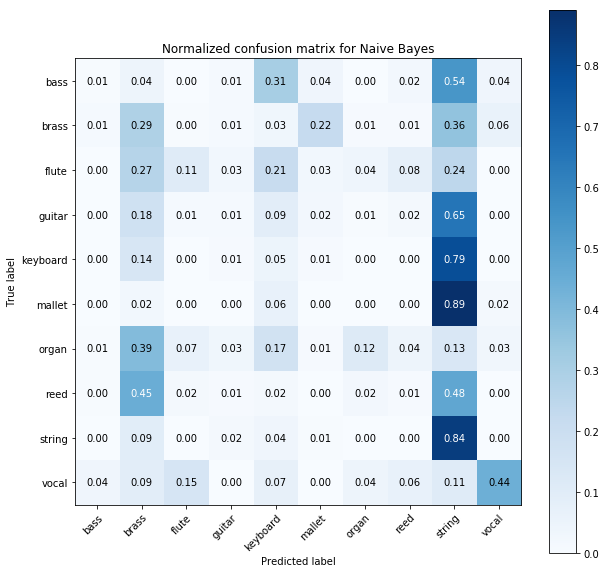

In [58]:
plot_confusion_matrix(y_test, y_pred_NB, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for Naive Bayes')
plt.savefig('ConfusionMatrix/NB_normalized.png')

# Random Forests

In [53]:
#instantiate the random forest
clf_Rf =RandomForestClassifier(n_estimators=20, max_depth=50, warm_start=True)

In [54]:
clf_Rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=True)

In [55]:
y_pred_RF = clf_Rf.predict(X_test)

In [57]:
accuracy_RF = np.mean(y_pred_RF == y_test)
print("The accuracy of Random Forest is {0:.2%}".format(accuracy_RF))

The accuracy of Random Forest is 57.37%


Normalized confusion matrix
[[0.57295374 0.         0.         0.07947805 0.12336892 0.17912218
  0.02016607 0.02016607 0.00237248 0.00237248]
 [0.19330855 0.69144981 0.02973978 0.01858736 0.01858736 0.
  0.         0.02973978 0.00371747 0.01486989]
 [0.07222222 0.00555556 0.64444444 0.02222222 0.02222222 0.06111111
  0.05       0.07222222 0.00555556 0.04444444]
 [0.20092025 0.00613497 0.0107362  0.49233129 0.21165644 0.06748466
  0.00766871 0.00153374 0.00153374 0.        ]
 [0.20234987 0.01958225 0.00522193 0.17362924 0.50913838 0.04308094
  0.02088773 0.00130548 0.01044386 0.01436031]
 [0.08415842 0.00990099 0.0049505  0.06435644 0.22772277 0.5990099
  0.         0.0049505  0.0049505  0.        ]
 [0.10159363 0.01792829 0.04183267 0.01394422 0.04183267 0.04780876
  0.57171315 0.04581673 0.02788845 0.08964143]
 [0.04680851 0.2212766  0.09787234 0.12765957 0.00425532 0.00425532
  0.         0.38297872 0.10212766 0.01276596]
 [0.02614379 0.00980392 0.00326797 0.04248366 0.03921569 0.00

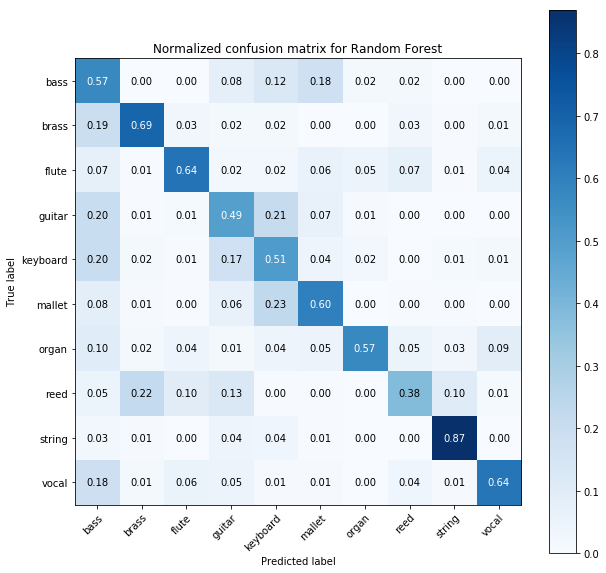

In [98]:
plot_confusion_matrix(y_test, y_pred_RF, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for Random Forest')
plt.savefig('ConfusionMatrix/RF_Normalized.png')

## Grid Search

In [68]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [63]:
param_dist = {"n_estimators" : [20, 40, 60, 80],
              "max_depth": [10, 20, 30, 40],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [70]:
#instantiate a new random forest
clf_RF_CV=RandomForestClassifier()

#set number of iterations
n_iter_search = 20
#creat the random search class
random_search_RF = RandomizedSearchCV(clf_RF_CV, param_distributions=param_dist,
                                      n_iter=n_iter_search, cv=5)
#
random_search_RF.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'n_estimators': [20, 40, 60, 80], 'max_depth': [10, 20, 30, 40], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1afb2d68>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1afb2e10>, 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, v

In [71]:
y_pred_RF_random = random_search_RF.predict(X_test)
accuracy_RF_random = np.mean(y_pred_RF_random == y_test)
print("The accuracy of Random Forest is {0:.2%}".format(accuracy_RF_random))

The accuracy of Random Forest is 62.23%


Normalized confusion matrix
[[0.63107948 0.         0.         0.05931198 0.08659549 0.19572954
  0.01423488 0.00830368 0.00355872 0.00118624]
 [0.17843866 0.69888476 0.03345725 0.0260223  0.01858736 0.
  0.         0.02230483 0.         0.02230483]
 [0.00555556 0.00555556 0.7        0.         0.01111111 0.02222222
  0.1        0.02222222 0.         0.13333333]
 [0.15337423 0.00306748 0.00613497 0.53067485 0.23466258 0.06134969
  0.00613497 0.00460123 0.         0.        ]
 [0.1383812  0.01044386 0.00652742 0.21671018 0.56788512 0.03524804
  0.01305483 0.         0.00391645 0.0078329 ]
 [0.04950495 0.         0.         0.02475248 0.18316832 0.73762376
  0.         0.0049505  0.         0.        ]
 [0.09163347 0.00996016 0.03784861 0.00398406 0.02988048 0.0438247
  0.58167331 0.05378486 0.04581673 0.10159363]
 [0.01702128 0.21702128 0.05957447 0.10638298 0.02978723 0.
  0.         0.44680851 0.1106383  0.01276596]
 [0.02287582 0.00326797 0.         0.02614379 0.0130719  0.00980392
 

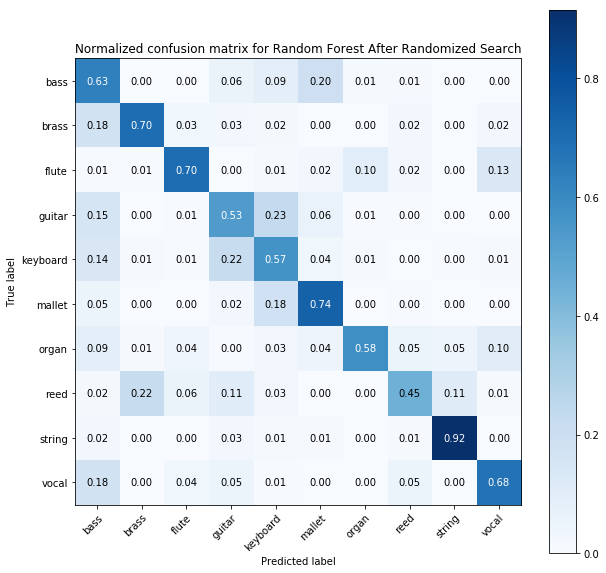

In [99]:
plot_confusion_matrix(y_test, y_pred_RF_random, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for Random Forest After Randomized Search')
plt.savefig('ConfusionMatrix/RF_Normalized_RandomSearch.png')

In [112]:
random_search_RF.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=20, max_features=9, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [75]:
# pickle the trained model
with open("SavedModels/random_search_RF.pickle", mode='wb') as file:
    pickle.dump(random_search_RF, file)

# SVM

In [77]:
#instantiate the sclaer
scaler = MinMaxScaler()

In [85]:
#scale the feature space
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

In [100]:
#instatiate the  classifier
clf_svm = SVC(C=0.1)

In [101]:
clf_svm.fit(X_train_scale, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [102]:
y_pred_svm = clf_svm.predict(X_test)
accuracy_svm = np.mean(y_pred_svm == y_test)
print("The accuracy of SVMs is {0:.2%}".format(accuracy_svm))

The accuracy of SVMs is 4.39%


In [107]:
#display non normalized confusion matrix
confusion_matrix(y_test, y_pred_svm)

array([[  0,   0, 843,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 269,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 180,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 652,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 766,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 202,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 502,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 235,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 306,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 141,   0,   0,   0,   0,   0,   0,   0]])

Normalized confusion matrix
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


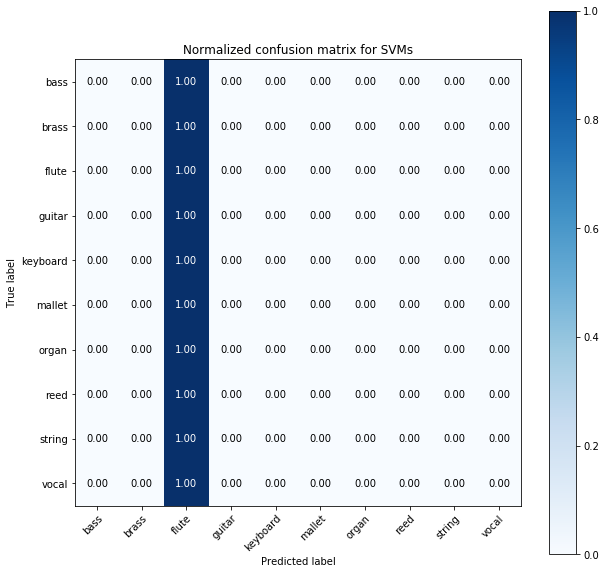

In [103]:
plot_confusion_matrix(y_test, y_pred_svm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for SVMs')
plt.savefig('ConfusionMatrix/SVM_Normalized.png')